In [124]:
import pandas as pd
import re # re.search etc. regular expressions

Create the Reference Table:
Create a DataFrame that defines your categories, subcategories, and corresponding descriptions.

In [125]:
import pandas as pd

# Reference table for categories and subcategories
# ???? CENTER FOR INTUITIVE P WARREN OH
# ???? GOOGLE *Symfonium Musi g.co/helppay#CA
# ??? CLEVELAND KIDNEY & HYP 216-2616253 OH
categories_data = {
    'Income': {
        'Anita Income': ['ZELLE DEP ANITA'],
        'Fidelity Transfer': ['FID ']
    },
    'Rewards': {
        'KeyBank Cash-Back': ['KEY REWARDS', 'GIFT FROM KEY BANK']
    },
    'Taxes': {
        'Taxes': ['TAXREFUND', 'IRS', 'TAX REF', 'RITA']
    },
    'Payments': {
        'Visa Payment': ['INTERNET TRF TO CCA']
    },
    'Fees': {
        'Transaction Fees': ['TRANSACTION FEE']
    },
    # PRESUMABLY CHECKING ACCT
    'Housing': {
        'Mortgage': ['WFHM'],
        'Bills n Utilities': ['VERIZON', 'DOMINION', 'FIRST ENERGY', 'NORTHEAST OHIO', 'CLEVELAND HEIGHTS', 'ENBRIDGE GAS', 'ATT', 'NEORSD', 'CWD']
    },
    'Insurance': {
        'Medical Insurance': ['MEDICARE', 'VSP', 'UNITEDHEALTHCARE', 'ROCKWELL', 'AARP HEALTH'],
        'Car Insurance': ['LIBERTY MUTUAL']
    },
    'Education': {
        'College Tuition': ['SMARTPAYCIA', 'CASHNET', 'CIA', 'BURREN', 'COLLEGE'],
        'Art Supplies': ['UTRECHT', ' ART ']
    },
    # PRESUMABLY CREDIT
    'Transportation': {
        'Gas': ['SUNOCO', 'BP', 'SHELL', 'MARATHON', 'CIRCLE K', 'SHEETZ', 'GAS'],
        'Car Maintenance': ['REPAIR', 'AUTO', 'BODY', 'QUALITY AUTO'],
        'Car Registration' : ['BUREAU MOTOR VE']
    },
    'Food': {
        'Groceries': ['GROCERY', 'HEINEN', 'DAVE', 'WHOLE', 'SODA', 'TRADE'],
        'Dining Out': ['TAVERN', 'TOMMYS', 'CAFE', 'WASABI', 'PACIFIC', 'ANATOLIA', 'BATUQUI', 'PHO', 'LAKE HOUSE', 'DEWEY',\
                        'BANANA', 'BANGKOK', 'HIBACHI', 'LOTUS', 'SUBSHOPPE', 'NATURES OASIS', 'BRASSICA', 'RESTAUR', 'BUFFALO', 'COZUMEL'],
        'Fast Food': ['LEFTY', 'SHAKE SHACK', 'WENDY', 'BUDDA', 'CILANTRO', 'PANERA', 'CHIPOTLE', 'BIBIBOP', 'ROGERS', 'PIADA'],
        'World Food': ['KRAKOW', 'NIPA HUT'],
        'Why DOORDASH?': ['DOORDASH']
    },
    'Health & Beauty': {
        'Aikido n Yoga': ['CHECK', ' YOGA'], 
        'Beauty n Supplies': ['LADIES', 'BATH', 'SALLY BEAUTY', 'AVEDA', 'LUSH BEACHWOOD', 'AIKIKAI', 'AIKIDO', 'ATMA', 'PADDLE'],
        'Medical and Dental': ['PEDIATRICS', 'CLEVELAND CLINIC', 'METROHEALTH', 'WESTERN RESERVE PERIO'],
        'Pharmacy': ['CVS', 'WALGREENS']
    },
    'Home & Garden': {
        'House Maintenance': ['HOME DEPOT'],
        'Furnishing': ['WORLD', 'REFURNISHING', 'KOALA', 'WAYFAIR'],
        'Garden': ['BREMEC', 'LANDSCAPE', 'STUMP', 'NATURE CENTER']
    },
    'Subscriptions': {
        'Subscription': ['SPOTIFY', 'APPLE', 'NETFLIX', 'AUDIBLE', 'PEACOCK', 'WALL', 'BITDEFENDER', 'MICROSOFT', 'HULU', 'NYTIMES', 'IDEASTREAM', 'WSJ']
    },
    'Shopping': {
        'Amazon': ['AMAZON', 'AMZN'],
        'Department Store': ['TARGET', 'MACY'],
        'Clothes': ['REI', 'NORDSTROM', 'DICK', 'DSW', 'AVALON', 'MARSHALLS', 'ANN TAYLOR', 'AMERICAN EAGLE', 'FOOTWEAR'],
        'Kindle n Books': ['KINDLE', 'AUDIOTEKA', 'LOGANBERRY', 'EMPIK'],
        'Software n Accessories': ['CLIP STUDIO', 'ALIEXPRESS'],
        'Gifts': ['FIDDLEHEAD', 'PASSPORT', 'DIAMONDS FLOWERS', 'BUNDT', 'ALL CITY CANDY'],
        'Kids Toys': ['PLAYMATTERS', 'DISNEYSTORE'],
        'Cycling' : ['BIKES']
    },
    'Pets': {
        'Cat Food n Supplies': ['PET', 'CHEWY', 'HOLLYWOOD FEED', 'JACKSON GALAXY'],
        'Cat Health': ['VETERINARY']
    },
    # ENTERTAINMENT n GIFTS
            # MOVIES THEATER COMPUTER GAMES BIRTHDAY CAKES BDAY DINNERS ETC
            # NOTE: CLEVELAND INSTITUTE OF CLEVELAND ==== CIA CINEMATEQUE
            # MUSEUM ===== includes THE CHILDRENS MUSEUM O CLEVELAND OH 
            # GREATER CLEVELAND AQUA ==== CLEVELAND AQUARIUM
            # MANGO MANGO DESSE CLEVELAND ===== mango mango dessert Sof's birthday with Felix
            # DIAMONDS FLOWERS ========= flower shop Coventry
    'Entertainment': {
        'Fun Out': ['GREATER CLEVELAND AQUA', 'MITCHELL', 'BORDERLIGHT',\
                                      'SWEET FIX', 'STONE OVEN', 'MANGO MANGO DESSE',\
                                          'ON THE RISE', 'RISING STAR COFFEE', 'MICHAELS', 'UPTOWN MART', 'ELLIE-MAYS', '6 FLAVORS INDIAN', 'LUXE KITCHEN'],
        'Movies n Theater': ['VUDU', 'FANDANGO', 'DOBAMA','THEAT', 'CLEVELAND PUBLIC', 'CLEVELAND INSTITUTE OF CLEVELAND',\
                                   'MOVIE', 'PRIME VIDEO', 'BORDERLIGHT', 'CINEMA'],
        'Music n Games': ['STEAMGAMES', 'BANDCAMP']
    },
    'Political': {
        'Political Donations': ['ACTBLUE']
    },
    'Professional': {
        'Professional Fees': ['LICENSURE', 'LICENSE']
    },
    'Travel': {
        'Air Travel': ['LOT ', 'AMERICAN', 'EXPEDIA'],
        'Visiting Grandma Ela': ['PLUSKI', 'OLSZTYN', re.compile(r' POL$'), re.compile(r' IL$')],
        'Vacation SC': ['FOLLY', 'VIATORTRIPADVISOR', 'VACASA', 'VRBO', re.compile(r' SC$'), re.compile(r' NC$'), re.compile(r' WV$')],
        'Visiting Wanda': [re.compile(r' VA$'), re.compile(r' GA$'), re.compile(r' MD$')],
        'Visiting Eva': ['PITTSBURGH', 'TURNPIKE', re.compile(r' PA$')]
    },
    'Other': {
        'PAYMENT': ['PAYMENT'],
        'Accounted Elsewhere': ['DELTA DENTAL']
    }
}

# Convert the hierarchical dictionary into a DataFrame for easier processing
categories_list = []
for category, subcategories in categories_data.items():
    for subcategory, keywords in subcategories.items():
        categories_list.append({'Category': category, 'Subcategory': subcategory, 'DescriptionKeywords': keywords})

categories_df = pd.DataFrame(categories_list)

Function to Categorize Transactions:
Create a function that uses the reference table to categorize transactions based on the description.

In [126]:
def categorize_transaction(description, categories_df):
    description_upper = description.upper() 
    for index, row in categories_df.iterrows():
        for keyword in row['DescriptionKeywords']:
            if isinstance(keyword, str) and keyword in description_upper:
                return row['Category'], row['Subcategory']
            elif isinstance(keyword, re.Pattern) and keyword.search(description_upper):
                return row['Category'], row['Subcategory']
    return 'Uncategorized', 'Uncategorized'

In [127]:
def load_and_append(file_path, current_df):
    """
    Load a CSV file and append its content to the current DataFrame.

    Parameters:
    - file_path: str, the path to the new CSV file
    - current_df: pd.DataFrame, the current DataFrame

    Returns:
    - pd.DataFrame, the updated DataFrame with the new data appended
    """
    # Load the new DataFrame from the CSV file
    new_df = pd.read_excel(file_path)

    # Append the new DataFrame to the current DataFrame
    updated_df = pd.concat([current_df, new_df], ignore_index=True)

    return updated_df

In [128]:
# Load the CSV files with credit card and checking card records
creditcard_filename = '2025-01-A&T-CCard.xlsx'
checking_filename = '2025-01-A&T-CheckingAcct.xlsx'

output_datafile_summary = '2025-01-A&T-SUMMARY.csv'
categorized_expenses_filename = '2025-01-A&T-CATEGORIZED.csv'

df_credit = pd.read_excel(creditcard_filename)
df_checking = pd.read_excel(checking_filename)
print(df_credit.head())
print(df_checking.head())

# Check the first few rows to understand the structure of your data.
df = pd.concat([df_checking, df_credit], ignore_index=True)
df.head()

        Date  Amount                             Description  Ref.#
0 2025-01-30  -36.56  DAVE'S SUPERMARKET #22 CLEVELAND HTSOH   6089
1 2025-01-30  -12.95                   SPOTIFY 8777781161 NY   4123
2 2025-01-30   -5.00    IDEASTREAM PUBLIC MEDI 2169166100 OH   4123
3 2025-01-29  -12.16         WALGREENS #4130 CLEVELAND HEIOH   6089
4 2025-01-28  208.39     WF *WAYFAIR4356136972 8662638325 MA   4123
        Date   Amount                                Description  Ref.#
0 2025-01-31  -131.32                             NEORSD WEB PAY    NaN
1 2025-01-31   -56.08      ENBRIDGE GAS OHIBILLPAY 5500044461403    NaN
2 2025-01-31 -6133.73  INTERNET TRF TO CCA XXXXXXXXXXXX4123 0101    NaN
3 2025-01-29 -1487.31          BILL PAY:WFHM 708 057939 PB51TFEM    NaN
4 2025-01-28  -211.51                   VERIZON WIRELESSPAYMENTS    NaN


,Date,Amount,Description,Ref.#
0,2025-01-31,-131.32,NEORSD WEB PAY,NaN
1,2025-01-31,-56.08,ENBRIDGE GAS OHIBILLPAY 5500044461403,NaN
2,2025-01-31,-6133.73,INTERNET TRF TO CCA XXXXXXXXXXXX4123 0101,NaN
3,2025-01-29,-1487.31,BILL PAY:WFHM 708 057939 PB51TFEM,NaN
4,2025-01-28,-211.51,VERIZON WIRELESSPAYMENTS,NaN


In [129]:
df = load_and_append('2024-10-A&T-CCard.xlsx', df)
df = load_and_append('2024-10-A&T-CheckingAcct.xlsx', df)
df = load_and_append('2024-11-A&T-CCard.xlsx', df)
df = load_and_append('2024-11-A&T-CheckingAcct.xlsx', df)
df = load_and_append('2024-12-A&T-CCard.xlsx', df)
df = load_and_append('2024-12-A&T-CheckingAcct.xlsx', df)

In [130]:

# Apply the function to categorize transactions
df[['Category', 'Subcategory']] = df['Description'].apply(lambda x: pd.Series(categorize_transaction(x, categories_df)))

sorted_df = df.sort_values(by='Category')
# Print the categorized DataFrame
print(sorted_df)

sorted_df.to_csv(categorized_expenses_filename)

          Date  Amount                             Description   Ref.#  \
75  2025-01-10  -21.59          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
90  2025-01-04   -3.23          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
108 2024-09-27   -7.25  SQ *RISING STAR COFFEE Shaker HeightOH  4123.0   
56  2025-01-17  -10.63   BANDCAMP GONDWANA RECO BANDCAMP.CO CA  4123.0   
104 2024-09-29   -4.31          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
..         ...     ...                                     ...     ...   
54  2025-01-18   -6.46  GOOGLE *Symfonium Musi g.co/helppay#CA  4123.0   
13  2025-01-07  -40.00                        PAYPAL INST XFER     NaN   
142 2024-09-12   -5.00  2689PEPSIVEN9147678600 ELK GROVE VILIL  4123.0   
130 2024-09-14  -85.85      USPS PO 3816550181 CLEVELAND HEIOH  4123.0   
96  2025-01-01  -91.80        CENTER FOR INTUITIVE P WARREN OH  6089.0   

          Category       Subcategory  
75   Entertainment  Movies n Theater  
90   Entertainment  Movies n Thea

Categorize the transactions:

Add a new column for categories. You can create a function to categorize transactions based on the description or other columns.

Convert the date column to datetime:

Ensure the date column is in datetime format.

In [131]:
# Convert the date column to datetime:
# Ensure the date column is in datetime format.

df['Date'] = pd.to_datetime(df['Date'])

#Group by month:
# Extract the month and year from the date column and group the data by these values.

df['YearMonth'] = df['Date'].dt.to_period('M')

# Summarize expenses by category for each month
monthly_expenses = df.groupby(['YearMonth', 'Category'])['Amount'].sum().unstack().fillna(0)

print(monthly_expenses)
monthly_expenses.to_csv(output_datafile_summary, index=False)

Category   Entertainment   Fees     Food  Health & Beauty  Home & Garden  \
YearMonth                                                                  
2024-09           -70.37 -12.66 -1619.35          -429.47           0.00   
2025-01          -149.09  -0.64 -1975.90         -1172.55        -698.02   

Category   Housing   Income  Insurance   Other  Payments   Pets  Political  \
YearMonth                                                                    
2024-09   -2046.88   5000.0    -794.62 -162.36      0.00 -218.5      -26.0   
2025-01   -2092.97  11500.0    -997.49 -162.36  -6133.73  -92.6        0.0   

Category   Shopping  Subscriptions   Taxes  Transportation  Travel  \
YearMonth                                                            
2024-09     -434.52        -108.47 -292.70         -104.82 -479.16   
2025-01     -490.10        -132.34 -276.59          -32.10 -357.00   

Category   Uncategorized  
YearMonth                 
2024-09          -113.15  
2025-01          -25

Analyze and visualize the data:

You can now analyze the monthly expenses by category and create visualizations.

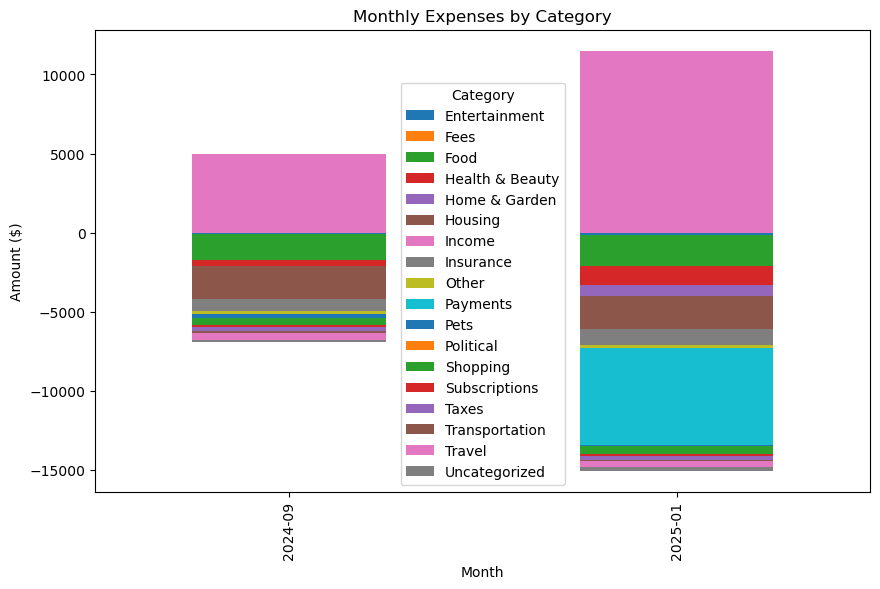

In [132]:
import matplotlib.pyplot as plt

# Plot monthly expenses by category
monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.show()